<a href="https://colab.research.google.com/github/xxKamilxx/Forecasting_new_cases_Covid-19_in_Poland/blob/master/Korona_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import datetime
import os
from matplotlib import pyplot as plt

In [0]:
raw_confirmed=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
raw_deaths=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
raw_recovered=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")


raw_confirmed


In [0]:
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Country/Region'],value_name='Cases',var_name='Date')
    df_cleaned=df_cleaned.set_index(['Country/Region','Date'])
    return df_cleaned 
ConfirmedCases=cleandata(raw_confirmed)
Deaths=cleandata(raw_deaths)
Recoveries=cleandata(raw_recovered) 



df=ConfirmedCases.loc['Poland']
# df=df.set_index('Date')
df

,Cases
Date,
Province/State,NaN
Lat,51.9194
Long,19.1451
1/22/20,0
1/23/20,0
...,...
3/30/20,2055
3/31/20,2311
4/1/20,2554


In [0]:
df=df[3:]

In [0]:
df

,Cases
Date,
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
3/30/20,2055
3/31/20,2311
4/1/20,2554


In [0]:
df.plot(y='Cases',figsize=(12,8))

In [0]:
data=df["Cases"].tail(40)
data=data.values.tolist()
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 5, 5, 11, 16, 22, 31, 49, 68, 103, 119, 177, 238, 251, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383]


In [0]:
import datetime

x = datetime.date(2018, 6, 1)

print(x.strftime("%x")) 

06/01/18


In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dropout
import warnings

In [0]:
np.random.seed(7)

In [0]:
df=df.tail(40)

In [0]:
train,test=df[:-10],df[-10:]

In [0]:
len(train)

30

In [0]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)


In [0]:
n_input=10
n_f=1
generator=TimeseriesGenerator(train,train,length=10,batch_size=1)

In [0]:
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(10,1)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator,epochs=100)

In [0]:
preds=[]
batch=train[-n_input:].reshape((1,n_input,n_f))


In [0]:
for i in range(n_input):   
    preds.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[preds[i]]],axis=1)

In [0]:
df_pred=pd.DataFrame(scaler.inverse_transform(preds),index=df[-n_input:].index,columns=['Prediction'])

In [0]:
df_test=pd.concat([df,df_pred],axis=1)

No handles with labels found to put in legend.


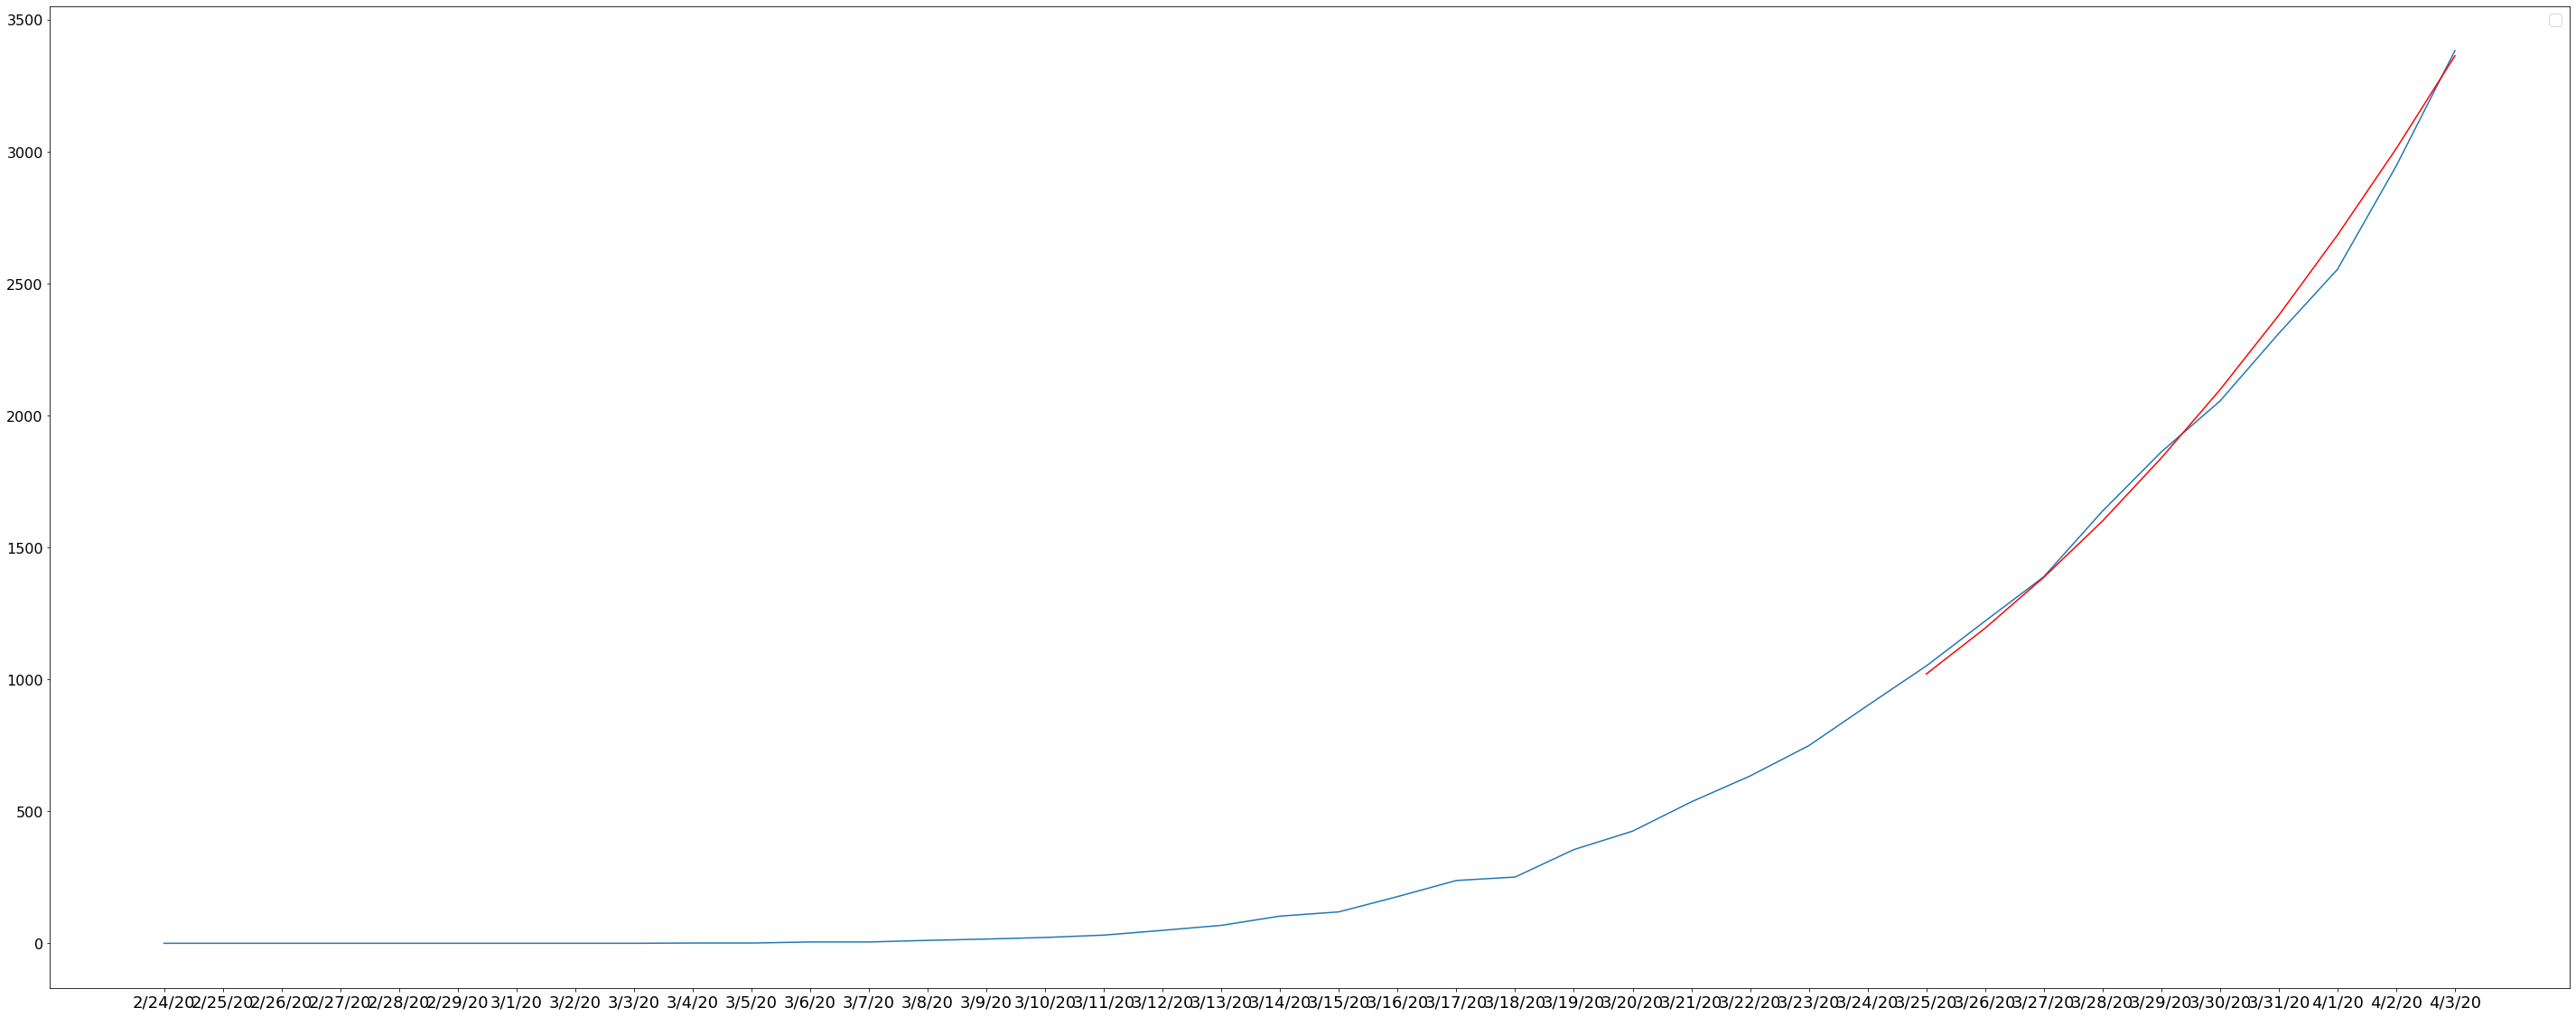

In [0]:
plt.figure(figsize=(50,20))
plt.plot(df_test.index,df_test['Cases'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
train=df

In [0]:
scaler.fit(train)
train=scaler.transform(train)

In [0]:
train

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.95595625e-04],
       [2.95595625e-04],
       [1.47797813e-03],
       [1.47797813e-03],
       [3.25155188e-03],
       [4.72953000e-03],
       [6.50310375e-03],
       [9.16346438e-03],
       [1.44841856e-02],
       [2.01005025e-02],
       [3.04463494e-02],
       [3.51758794e-02],
       [5.23204257e-02],
       [7.03517588e-02],
       [7.41945019e-02],
       [1.04936447e-01],
       [1.25628141e-01],
       [1.58439255e-01],
       [1.87407626e-01],
       [2.21401123e-01],
       [2.66331658e-01],
       [3.10671002e-01],
       [3.60922258e-01],
       [4.10582323e-01],
       [4.84185634e-01],
       [5.50399054e-01],
       [6.07449010e-01],
       [6.83121490e-01],
       [7.54951227e-01],
       [8.70824712e-01],
       [1.00000000e+00]])

In [0]:
ninputs=10
f=1
generator2=TimeseriesGenerator(train,train,length = ninputs, batch_size=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
model.fit_generator(generator,epochs=100)

In [0]:
pred=[]
batch=train[-10:].reshape((1,ninputs,f))

In [0]:
len(batch)

1

In [0]:
for i in range(10):
  pred.append(model.predict(batch)[0])
  batch=np.append(batch[:,1:,:],[[pred[i]]],axis=1)

In [0]:
import datetime
from pandas.tseries.offsets import DateOffset
from datetime import timedelta
# x = datetime.date(2018, 6, 1)
# x=x+ timedelta(days=1) 
# print(x.strftime("%x")) 
new_date=[]
x=datetime.datetime.strptime(df.index[-1], "%x").date()
for i in range(11):
  x=x+timedelta(days=1)
  # print(x.strftime("%x")) 
  new_date.append(str(x))

In [0]:
new_date

['2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14']

In [0]:
future_dates=pd.DataFrame(index=new_date[0:],columns=df.columns)

In [0]:
future_dates[-10:]

,Cases
2020-04-05,NaN
2020-04-06,NaN
2020-04-07,NaN
2020-04-08,NaN
2020-04-09,NaN
2020-04-10,NaN
2020-04-11,NaN
2020-04-12,NaN
2020-04-13,NaN
2020-04-14,NaN


In [0]:
df_preds=pd.DataFrame(scaler.inverse_transform(pred),index=future_dates[-10:].index,columns=['Prediction'])

In [0]:
df_proj = pd.concat([df,df_preds], axis=1)


In [0]:
df_proj

,Cases,Prediction
2/24/20,0,NaN
2/25/20,0,NaN
2/26/20,0,NaN
2/27/20,0,NaN
2/28/20,0,NaN
2/29/20,0,NaN
3/1/20,0,NaN
3/2/20,0,NaN
3/3/20,0,NaN
3/4/20,1,NaN


No handles with labels found to put in legend.


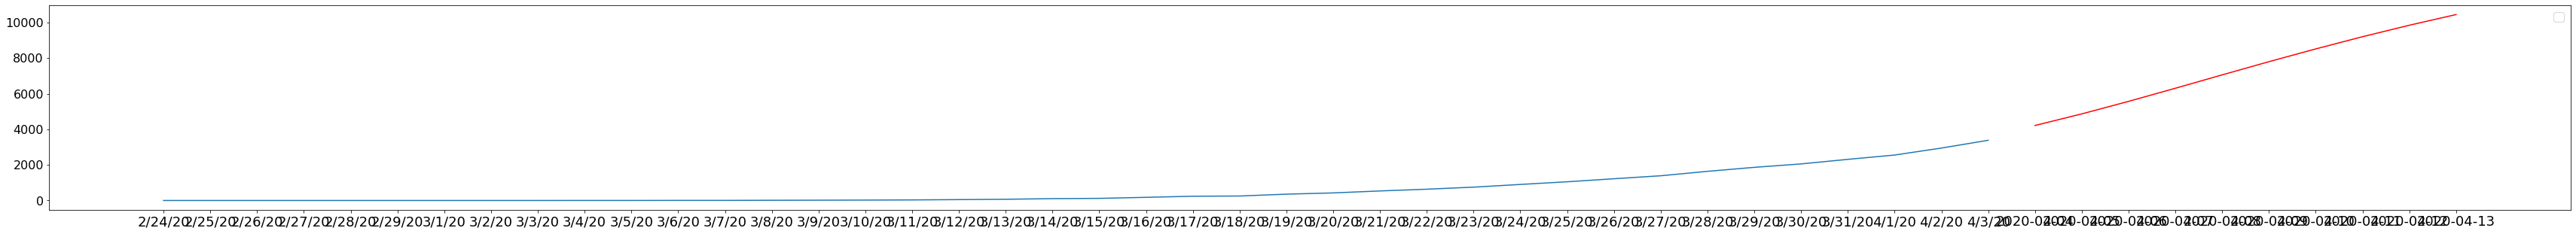

In [0]:
plt.figure(figsize=(60, 5))
plt.plot(df_proj.index, df_proj['Cases'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()
